# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 2: Simple Pendulum
## 02.19.2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats

In [2]:
sns.set_style(style='whitegrid')

In [35]:
linear = 'nonlinear'
# Length of pendulum L
L = 1.5
# Damping coefficient q
q = 0.6
# Driving frequencey Omega_D
Omega_D = 1.2
# Driving amplitude F_D
F_D = 0.15
# Theta(0)
theta = 7
# Omega(0)
omega = 5
# Integration time t_max
t_max = 15

In [36]:
os.system('..\Release\pendulum.exe ' +
          linear + ' ' +
          str(L) + ' ' +
          str(q) + ' ' +
          str(Omega_D) + ' ' +
          str(F_D) + ' ' +
          str(theta) + ' ' +
          str(omega) + ' ' +
          str(t_max)
         )
data = np.genfromtxt('pendulum.dat')

In [37]:
steps = 1
image_dpi = 150
image_format = 'pdf'

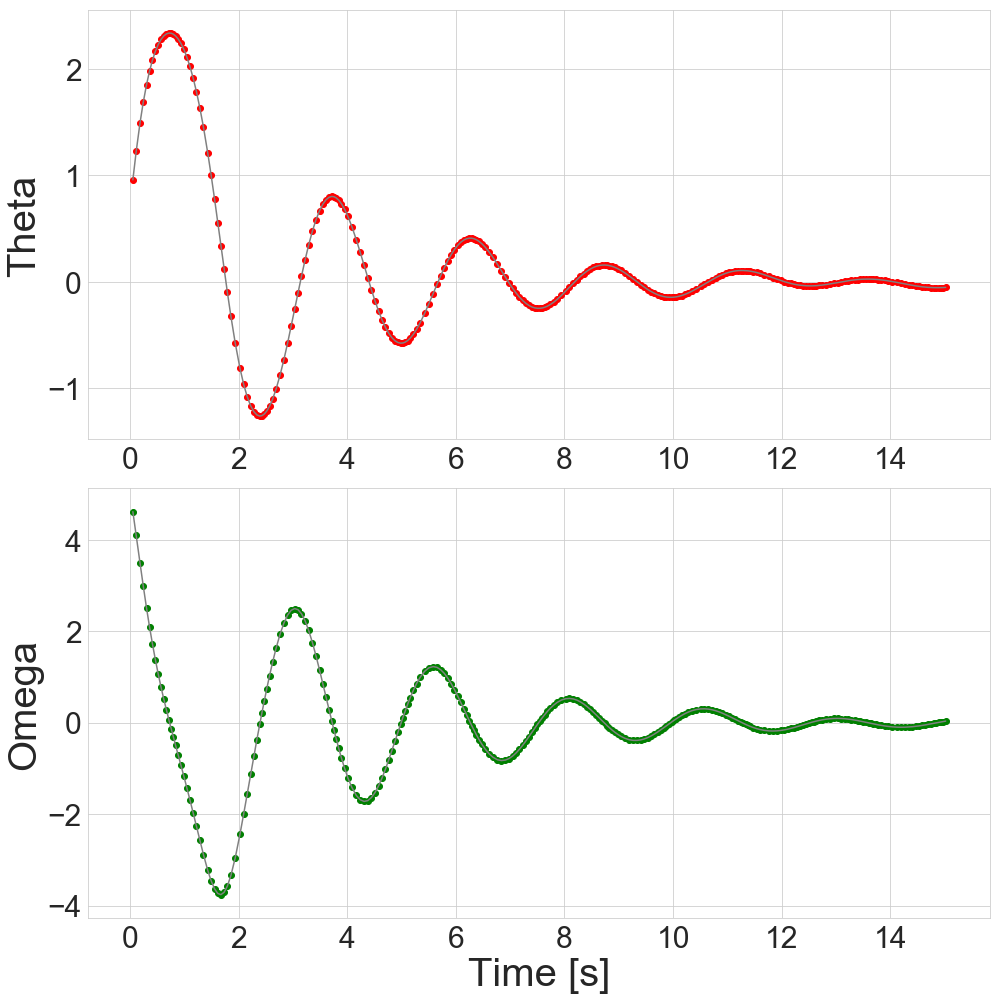

In [38]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data[::steps,0], data[::steps,1], color='grey')
axes[1].plot(data[::steps,0], data[::steps,2], color='grey')

axes[0].scatter(data[::steps,0], data[::steps,1], color='red')
axes[1].scatter(data[::steps,0], data[::steps,2], color='green')

axes[0].set_ylabel('Theta', fontsize=40)

axes[1].set_xlabel('Time [s]', fontsize=40)
axes[1].set_ylabel('Omega', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega.' + image_format, format=image_format, dpi=image_dpi)
plt.show()